In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("walmart-sales.csv")

In [3]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,...,Rating,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,1/5/2019,13:08,...,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3/8/2019,10:29,...,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,3/3/2019,13:23,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8.0,1/27/2019,20:33,...,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7.0,2/8/2019,10:37,...,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
 12  Unnamed: 12    0 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
 17  Unnamed: 17    0 non-null      float64
 18  Unnamed:

In [5]:
# Drop unnamed columns
d = df.drop(df.filter(like='^Unnamed'), axis=1,inplace=True)

In [6]:
df.describe

<bound method NDFrame.describe of        Invoice ID Branch       City Customer type  Gender  \
0     750-67-8428      A     Yangon        Member  Female   
1     226-31-3081      A  Naypyitaw        Normal  Female   
2     631-41-3108      A     Yangon        Normal    Male   
3     123-19-1176      B     Yangon        Member    Male   
4     373-73-7910      C     Yangon        Normal    Male   
...           ...    ...        ...           ...     ...   
997   727-02-1313      A     Yangon        Member    Male   
998   347-56-2442      B     Yangon        Normal    Male   
999   849-09-3807      C     Yangon        Member  Female   
1000          NaN    NaN        NaN           NaN     NaN   
1001          NaN    NaN        NaN           NaN     NaN   

                Product line  Unit price  Quantity       Date   Time  ...  \
0          Health and beauty       74.69       7.0   1/5/2019  13:08  ...   
1     Electronic accessories       15.28       5.0   3/8/2019  10:29  ...   
2 

In [7]:
df.shape


(1002, 21)

In [8]:
df.size

21042

In [9]:
df.duplicated().sum()

1

In [10]:
df.isnull().sum()

Invoice ID          2
Branch              2
City                2
Customer type       2
Gender              2
Product line        2
Unit price          2
Quantity            2
Date                2
Time                2
Payment             2
Rating              2
Unnamed: 12      1002
Unnamed: 13      1002
Unnamed: 14      1002
Unnamed: 15      1002
Unnamed: 16      1002
Unnamed: 17      1002
Unnamed: 18      1002
Unnamed: 19      1002
Unnamed: 20      1002
dtype: int64

In [11]:
# Check columns after dropping
print(df.columns) 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')


In [12]:
data = {'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'}
d1 = pd.DataFrame(data)
# Column name to remove
column_to_remove = {'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'}

# Remove the column using drop method
d1 = df.drop(column_to_remove, axis=1,inplace=True)
print(d1)

None


In [13]:
df.corr(numeric_only=True)


,Unit price,Quantity,Rating
Unit price,1.000000,0.010778,-0.008778
Quantity,0.010778,1.000000,-0.015815
Rating,-0.008778,-0.015815,1.000000


In [14]:
# Calculate revenue and number of sales for each branch and city
df['Revenue'] = df['Unit price'] * df['Quantity']  # Calculate revenue if not already in the dataset

# Group by Branch and City
branch_revenue_data = df.groupby(['Branch', 'City']).agg(
    Total_Revenue=('Revenue', 'sum'),  # Sum of revenue
    Total_Sales=('Quantity', 'sum')   # Sum of quantities sold
).reset_index()

# Print branch and city-level revenue data
print("Revenue and Sales Data by Branch and City:")
print(branch_revenue_data)

# Calculate total revenue and number of sales across branches
overall_sales_data = df.groupby('Branch').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Sales=('Quantity', 'sum'),
    Average_Unit_Price=('Unit price', 'mean')  # Optional: Include average unit price
).reset_index()

# Print the data grouped by Branch
print("\nRevenue and Sales Data by Branch:")
print(overall_sales_data)



Revenue and Sales Data by Branch and City:
  Branch       City  Total_Revenue  Total_Sales
0      A   Mandalay       34130.09        637.0
1      A  Naypyitaw       35985.64        648.0
2      A     Yangon       33647.27        598.0
3      B   Mandalay       37215.93        664.0
4      B  Naypyitaw       35157.75        604.0
5      B     Yangon       35193.51        631.0
6      C   Mandalay       29794.62        519.0
7      C  Naypyitaw       34160.14        579.0
8      C     Yangon       32302.43        630.0

Revenue and Sales Data by Branch:
  Branch  Total_Revenue  Total_Sales  Average_Unit_Price
0      A      103763.00       1883.0           54.360175
1      B      107567.19       1899.0           56.622412
2      C       96257.19       1728.0           56.072461


In [15]:
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating', 'Revenue'],
      dtype='object')


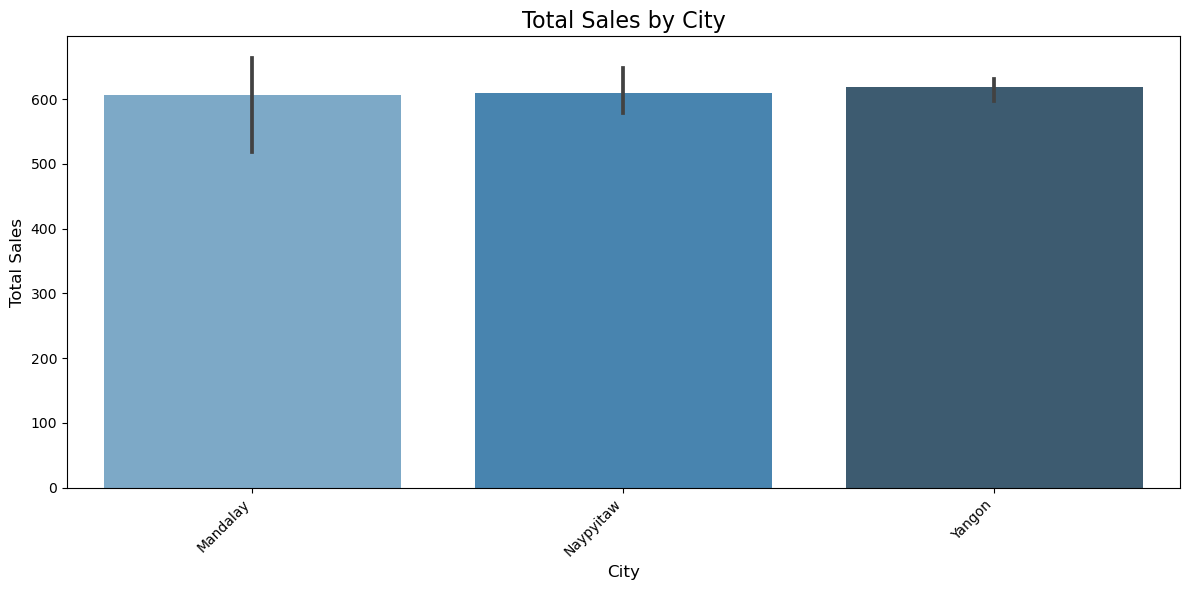

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the bar chart for Total Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total_Sales', data=branch_revenue_data, palette='Blues_d')

# Add titles and labels
plt.title("Total Sales by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


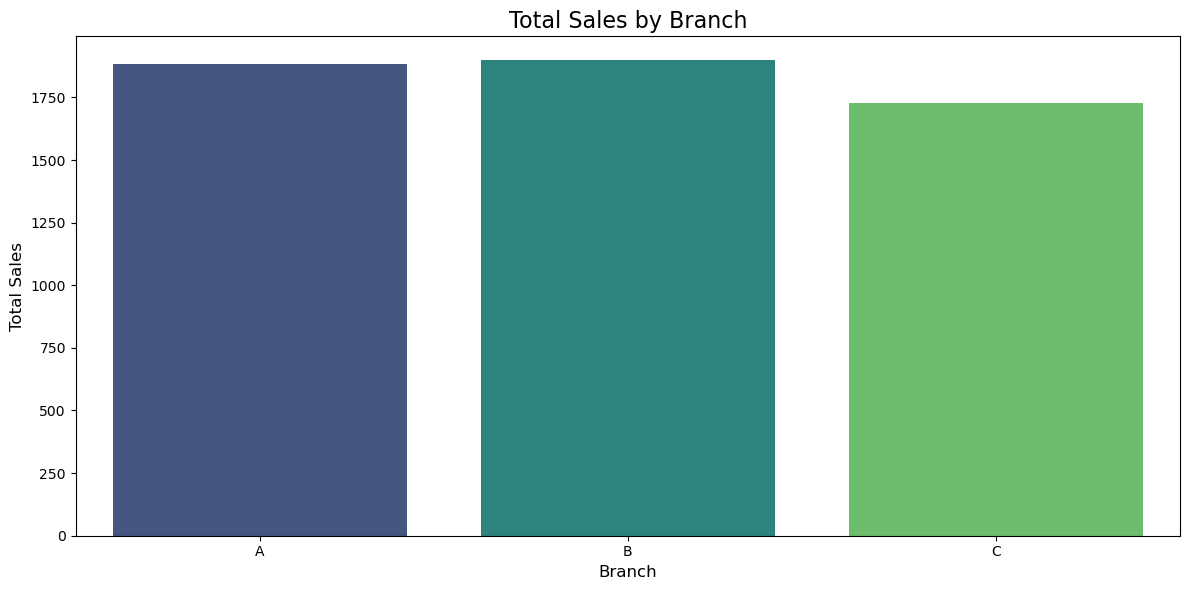

In [19]:
# Create the bar chart for Total Sales by Branch
plt.figure(figsize=(12, 6))
sns.barplot(x='Branch', y='Total_Sales', data=overall_sales_data, palette='viridis')

# Add titles and labels
plt.title("Total Sales by Branch", fontsize=16)
plt.xlabel("Branch", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()